In [1]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk


import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm

import cv2
import words_txt_to_df as wttd


In [2]:
df = wttd.txt_to_df()

In [3]:
df.head()

,word_id,ok_err,gray_level,transcript,data_path
0,a01-000u-00-00,ok,154,A,data/words/a01/a01-000u/a01-000u-00-00.png
1,a01-000u-00-01,ok,154,MOVE,data/words/a01/a01-000u/a01-000u-00-01.png
2,a01-000u-00-02,ok,154,to,data/words/a01/a01-000u/a01-000u-00-02.png
3,a01-000u-00-03,ok,154,stop,data/words/a01/a01-000u/a01-000u-00-03.png
4,a01-000u-00-04,ok,154,Mr.,data/words/a01/a01-000u/a01-000u-00-04.png


# Exploration des données

In [4]:
# Ajouter une colonne "count_char" qui compte le nombre de caractères pour chaque transcription
df["count_char"] = df.transcript.apply(lambda x: len(list(x)))

In [5]:
df.shape

(115320, 6)

In [6]:
# Affichage des 10 mots les plus longs
df.sort_values('count_char', ascending = False).head(10)


,word_id,ok_err,gray_level,transcript,data_path,count_char
107040,p02-109-01-00,err,175,----------------------------------------------...,data/words/p02/p02-109/p02-109-01-00.png,53
93511,m02-059-05-06,ok,176,middle-income-bracket,data/words/m02/m02-059/m02-059-05-06.png,21
80838,j07-000-04-03,ok,130,plate-and-corrugation,data/words/j07/j07-000/j07-000-04-03.png,21
102943,n04-092-03-01,ok,192,Lieutenant-Commander,data/words/n04/n04-092/n04-092-03-01.png,20
30311,c04-144-05-09,ok,181,brilliantly-written,data/words/c04/c04-144/c04-144-05-09.png,19
69127,g06-109-02-00,ok,191,travelling-carriage,data/words/g06/g06-109/g06-109-02-00.png,19
46266,f01-147-08-01,ok,159,neuro-physiologists,data/words/f01/f01-147/f01-147-08-01.png,19
45972,f01-085-05-08,ok,152,over-simplification,data/words/f01/f01-085/f01-085-05-08.png,19
5705,a02-050-00-04,err,203,counter-revolution,data/words/a02/a02-050/a02-050-00-04.png,18
32219,c06-111-02-01,ok,190,Marriage-Go-Round,data/words/c06/c06-111/c06-111-02-01.png,17


In [7]:
# Affichage des 10 mots les plus courts
df.sort_values('count_char', ascending = True).head(10)


,word_id,ok_err,gray_level,transcript,data_path,count_char
0,a01-000u-00-00,ok,154,A,data/words/a01/a01-000u/a01-000u-00-00.png,1
53110,g01-037-06-07,ok,148,",",data/words/g01/g01-037/g01-037-06-07.png,1
53108,g01-037-06-05,ok,148,",",data/words/g01/g01-037/g01-037-06-05.png,1
53105,g01-037-06-02,ok,148,",",data/words/g01/g01-037/g01-037-06-02.png,1
53094,g01-037-04-06,ok,145,",",data/words/g01/g01-037/g01-037-04-06.png,1
53085,g01-037-03-04,ok,148,",",data/words/g01/g01-037/g01-037-03-04.png,1
53067,g01-037-01-03,ok,149,-,data/words/g01/g01-037/g01-037-01-03.png,1
53066,g01-037-01-02,ok,149,',data/words/g01/g01-037/g01-037-01-02.png,1
53064,g01-037-01-00,ok,149,',data/words/g01/g01-037/g01-037-01-00.png,1
53061,g01-037-00-06,ok,149,',data/words/g01/g01-037/g01-037-00-06.png,1


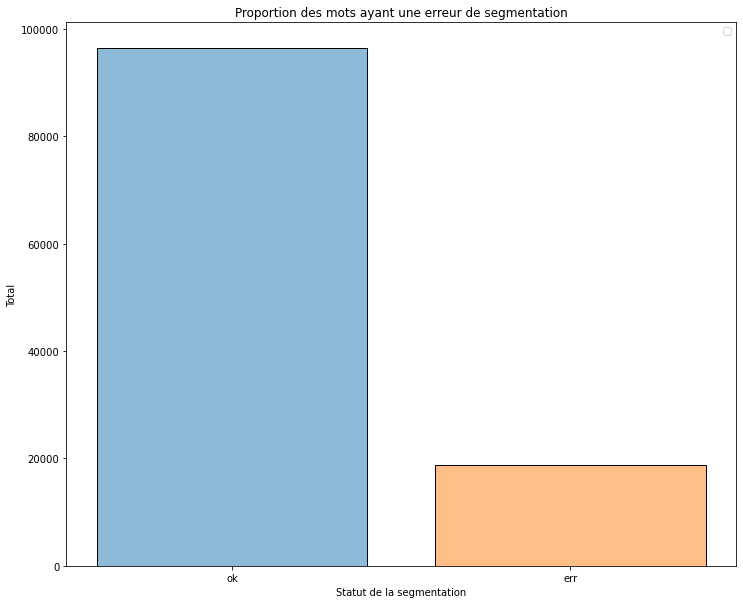

In [8]:
# Afficher le pourcentage des mots en erreurs
plt.subplots(figsize= (12,10))
sns.histplot(x = 'ok_err',data = df,hue ='ok_err', shrink = 0.8);
plt.title('Proportion des mots ayant une erreur de segmentation');
plt.xlabel('Statut de la segmentation')
plt.legend('')
plt.ylabel('Total');


In [9]:
df["count_char"].value_counts()

3     22087
1     18079
2     17605
4     16469
5     11275
6      8322
7      7336
8      5212
9      3782
10     2443
11     1310
12      760
13      368
14      172
15       46
16       37
17        8
19        4
21        2
18        1
20        1
53        1
Name: count_char, dtype: int64

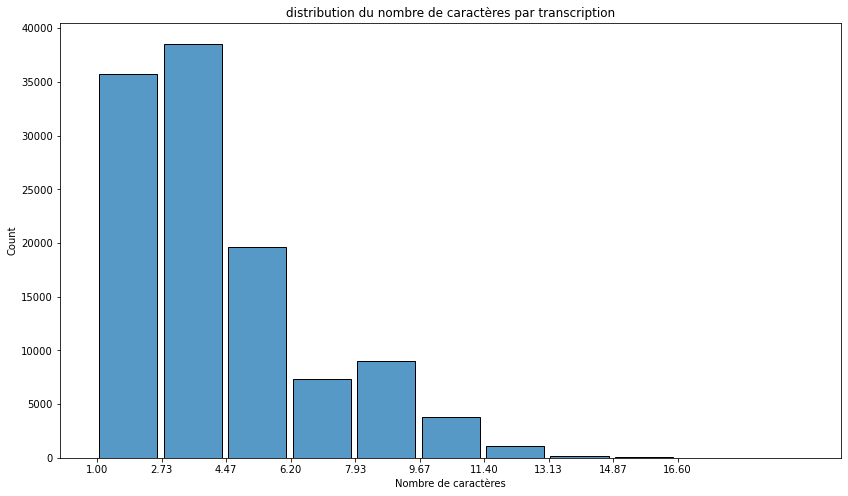

In [10]:
# Distribution du nombre de caractères par transcription
bins_edges = np.histogram_bin_edges(df["count_char"], bins = 30 )
plt.subplots(figsize= (14,8))
sns.histplot(data = df["count_char"], bins = 30,shrink = 0.9 )
plt.xticks(bins_edges[:10])
plt.xlabel("Nombre de caractères")
plt.xlim(0, 21)
plt.title('distribution du nombre de caractères par transcription');

In [11]:
print("Proportion des mots de moins de 10 caractères dans le dataset : ",len(df[df.count_char <=10])*100/len(df))

Proportion des mots de moins de 10 caractères dans le dataset :  97.65001734304543


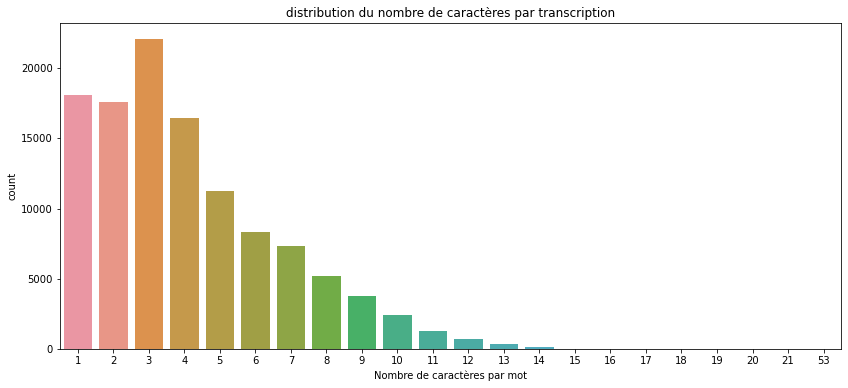

In [13]:
# Distribution du nombre de caractères par transcription
#bins_edges = np.histogram_bin_edges(df["count_char"], bins = 30 )
plt.subplots(figsize= (14,6))
sns.countplot(x ='count_char', data = df)
#plt.xticks(bins_edges[:10])
plt.xlabel("Nombre de caractères par mot")
#plt.xlim(0, 20)
plt.title('distribution du nombre de caractères par transcription');

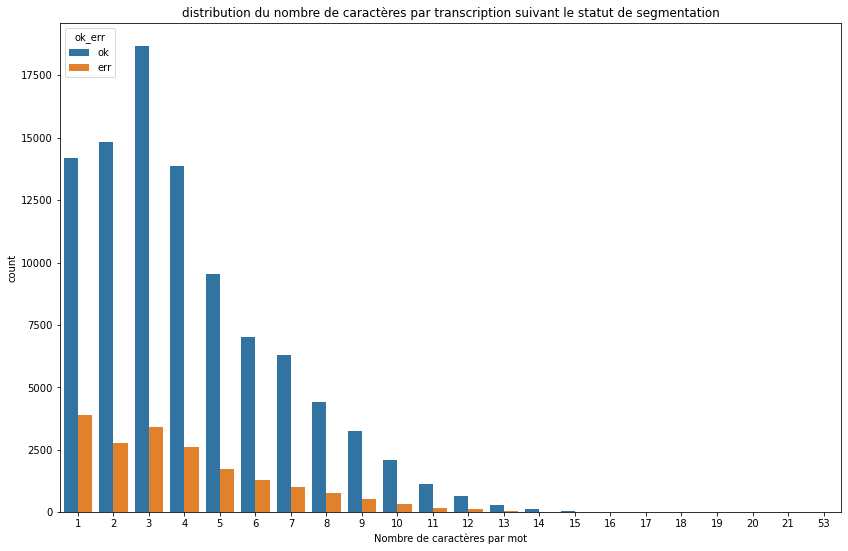

In [15]:
# Distribution du nombre de caractères par transcription
#bins_edges = np.histogram_bin_edges(df["count_char"], bins = 30 )
plt.subplots(figsize= (14,9))
sns.countplot(x ='count_char', data = df,hue = 'ok_err')
#plt.xticks(bins_edges[:10])
plt.xlabel("Nombre de caractères par mot")
#plt.xlim(0, 20)
plt.title('distribution du nombre de caractères par transcription suivant le statut de segmentation');

In [16]:
df_err = pd.DataFrame(df[df.ok_err=='err']["count_char"].value_counts())
df_err.head(20)

,count_char
1,3895
3,3432
2,2793
4,2610
5,1735
6,1313
7,1027
8,787
9,526
10,344


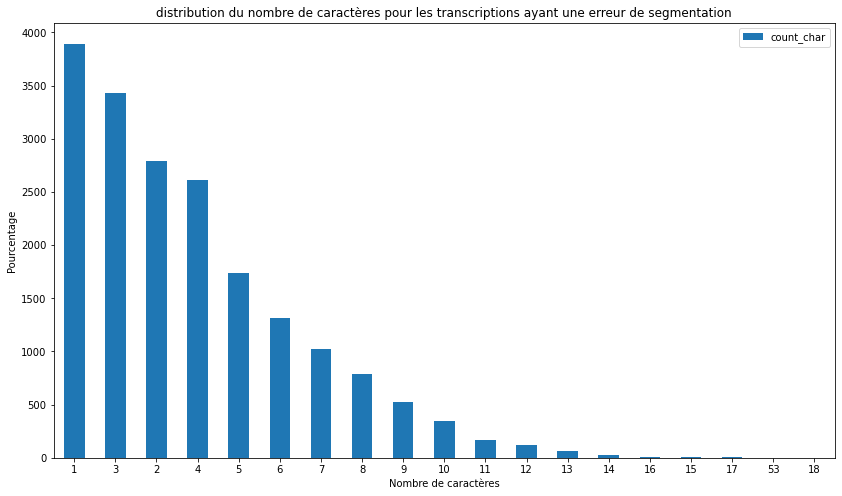

In [19]:

df_err.plot(kind = 'bar', figsize = (14,8))
plt.xticks(rotation = '0');
plt.xlabel("Nombre de caractères");
plt.ylabel('Pourcentage');
plt.title('distribution du nombre de caractères pour les transcriptions ayant une erreur de segmentation');

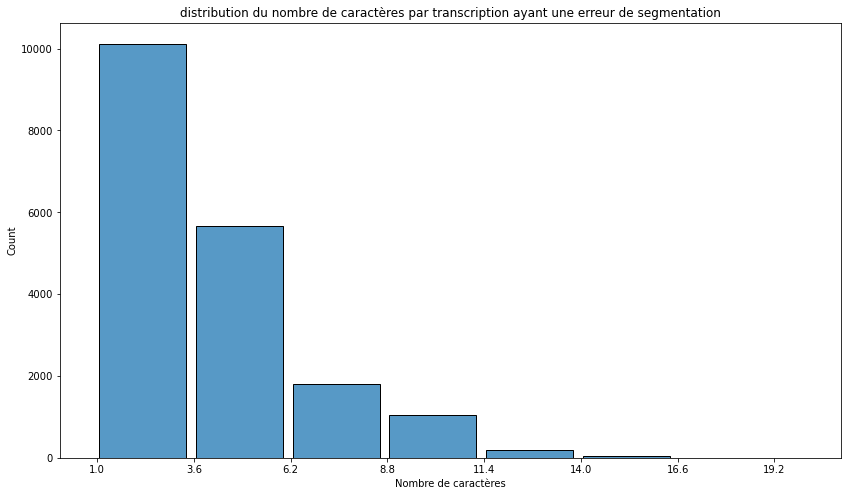

In [20]:
# Afficher pour quelles longueurs de mots a t'on le plus d'erreurs
bins_edges = np.histogram_bin_edges(df[df.ok_err=='err']["count_char"], bins = 20 )
plt.subplots(figsize= (14,8))
sns.histplot(data = df[df.ok_err=='err']["count_char"], bins = 20,shrink = 0.9 )
plt.xticks(bins_edges[:10])
plt.xlabel("Nombre de caractères")
plt.xlim(0, 21)
plt.title('distribution du nombre de caractères par transcription ayant une erreur de segmentation');